# NBAOLSS: Project

Chantal Rikse & Nigel Overmars & Machiel Kruger

In [1]:
import numpy

from fvm import Continuation
from fvm import Interface
from fvm import utils
from fvm import plot_utils

from jadapy import jdqz

from fvm.JadaInterface import JadaInterface, JadaOp

import matplotlib.pyplot as plt

## a)

In [2]:
dim = 2
dof = 3
nx = 64
ny = nx
nz = 1
n = dof * nx * ny * nz

# Define a point of interest, not clear what this does.
poi = (nx // 2, ny // 2)


# Define the problem
parameters = {'Problem Type': 'Lid-driven cavity',
              # Reynolds number set at 1, determines the vicousity of the model. 
              'Reynolds Number': 1,
              # We start at Lid velocity 0, as this result in a easy solution,
              # namely just the constant zero sol, no speed and no pressure diff
              'Lid Velocity': 0,
              # Value describes the value that is traced in the continuation
              # and time integration methods
              'Value': lambda x: utils.create_state_mtx(x, nx, ny, nz, dof)[poi[0], poi[1], 0, 0]}

# Initiate the tools given to us.

# First off the interface, this object handles the problem formulation, it contains 
# the discretized matrix, jacobian, rhs evals, and all other tools used in continuations. 
# We also define the size of the box and grid here. 
# The grid size parametes (nx,ny,nz) are parsed to the interface,
# note that the default size of the box is set to (1,1,1), which is what we want. 
# So no other size is specified. 
interface = Interface(parameters, nx, ny, nz, dim, dof)

print('Looking at point ({}, {})'.format(interface.discretization.x[poi[0]],
                                         interface.discretization.y[poi[1]]))

# Secondly we initiatlize the continuator, this object handles the continuation.
# It requires the interface and the parameters.
continuation = Continuation(interface, parameters)

# We define an initial guess of all zeros, which is the true solution if there is no lid velocity
x0 = numpy.zeros(dof * nx * ny * nz)
# We continue this exact solution as we increase lid velocity from 0 to the required 1. 
steady_sol = continuation.continuation(x0, 'Lid Velocity', 0, 1, 0.1)[0]
# With this, we have obtain the steady state solution for the 
# 2D lid-drive cavity problem with Reynolds number set to 1. 


Looking at point (0.515625, 0.515625)
Newton corrector converged in 0 iterations with ||F||=5.603022e-06
Lid Velocity: 0.025433
Newton corrector converged in 0 iterations with ||F||=5.042720e-05
Lid Velocity: 0.076298
Newton corrector converged in 1 iterations with ||F||=1.322450e-10
Lid Velocity: 0.178031
Newton corrector converged in 1 iterations with ||F||=3.349971e-10
Lid Velocity: 0.381502
Newton corrector converged in 1 iterations with ||F||=8.119144e-09
Lid Velocity: 0.788461
Newton corrector converged in 1 iterations with ||F||=1.298633e-07
Lid Velocity: 1.602410
Newton corrector converged in 1 iterations with ||F||=2.138273e-09
Lid Velocity: 1.000020
Newton corrector converged in 0 iterations with ||F||=1.048031e-07
Lid Velocity: 1.000000
Convergence achieved onto target Lid Velocity = 1.000000


## b)

In [3]:


# Note that the continuation object has already updated its internal lid velocity. 
# Therefore we do not need to update any parameters or redefine the contituation instance. 
ds = 100

# We continue the lid velocity 1, Reynolds number 1 solution to the lid velocity 1, Reynolds number 5000 solution.
target = 5000
steady_sol_5k, mu, data1 = continuation.continuation(steady_sol, 'Reynolds Number', 1, target, ds)

print("Starting second continuation...")

# Als note that the starting value set in the continuation, actually overrides 
# the one set in the parameters of the interface/continuator. So take care when adjusting it. 

# Continue the solution even further along Reynolds number parameter
ds = 100
target = 10000
steady_sol_10k, mu, data1 = continuation.continuation(steady_sol_5k, 'Reynolds Number', 5000, target, ds)

Newton corrector converged in 4 iterations with ||F||=3.467375e-05
Reynolds Number: 100.977504
Newton corrector converged in 2 iterations with ||F||=6.944243e-06
Reynolds Number: 175.980569
Newton corrector converged in 2 iterations with ||F||=1.632382e-05
Reynolds Number: 288.485143
Newton corrector converged in 2 iterations with ||F||=1.983675e-05
Reynolds Number: 457.242008
Newton corrector converged in 2 iterations with ||F||=3.791210e-05
Reynolds Number: 710.377308
Newton corrector converged in 2 iterations with ||F||=3.036580e-05
Reynolds Number: 1090.080258
Newton corrector converged in 1 iterations with ||F||=9.902455e-05
Reynolds Number: 1659.634683
Newton corrector converged in 3 iterations with ||F||=1.285885e-06
Reynolds Number: 2798.743535
Newton corrector converged in 1 iterations with ||F||=6.606220e-05
Reynolds Number: 3937.852386
Newton corrector converged in 2 iterations with ||F||=1.910483e-05
Reynolds Number: 5937.933771
Newton corrector converged in 0 iterations wi

KeyboardInterrupt: 

## Steady state plot Reynolds number at 1

In [ ]:
velocity_steady = plot_utils.create_state_mtx(steady_sol, nx, ny, nz, dof)
plot_utils.plot_velocity_magnitude(velocity_steady[:, :, 0, 0], velocity_steady[:, :, 0, 1], interface)

In [ ]:
# Plot the pressure
plot_utils.plot_value(velocity_steady[:, :, 0, 2], interface)

## Steady state plot Reynolds number at 5000

In [ ]:
velocity_5k = plot_utils.create_state_mtx(steady_sol_5k, nx, ny, nz, dof)
plot_utils.plot_velocity_magnitude(velocity_5k[:, :, 0, 0], velocity_5k[:, :, 0, 1], interface)

In [ ]:
# Plot the pressure
plot_utils.plot_value(velocity_5k[:, :, 0, 2], interface)

## Steady state plot Reynolds number at 10000

In [ ]:
velocity_10k = plot_utils.create_state_mtx(steady_sol_10k, nx, ny, nz, dof)
plot_utils.plot_velocity_magnitude(velocity_10k[:, :, 0, 0], velocity_10k[:, :, 0, 1], interface)

In [ ]:
# Plot the pressure
plot_utils.plot_value(velocity_10k[:, :, 0, 2], interface)

## c)

In [ ]:
sizes = [64, 128, 256]#, 512]
dim = 2
dof = 3
nz = 1

for nx in sizes:
    print("Currently looking at nx=ny={}".format(nx))
    ny = nx
    n = dof * nx * ny * nz
    poi = (nx // 2 - 1, ny // 4 - 1)

    # Luckily the FVM lib supports grid stretching. 
    # As in, actually the method that was asked of us to implement. 
    # So the grid stretching is implemented by just setting the parameter value.
    parameters = {'Problem Type': 'Lid-driven cavity',
              'Reynolds Number': 1,
              'Lid Velocity': 0,
              'Grid Stretching Factor': 1.5,
              'Verbose': True,
              'Value': lambda x: utils.create_state_mtx(x, nx, ny, nz, dof)[poi[0], poi[1], 0, 0]}

    # Define a new interface and continuation for each grid size.
    interface = Interface(parameters, nx, ny, nz, dim, dof)
    continuation = Continuation(interface, parameters)

    # The initial zero solultion for zero lid velocity. 
    x0 = numpy.zeros(dof * nx * ny * nz)
    # Continue this exact sol to the correct lid velocity.
    steady_sol = continuation.continuation(x0, 'Lid Velocity', 0, 1, 0.1)[0]
    print("Finished calculating starting solution for nx=ny={}".format(nx))
    print()
    
    # Continue the found branch to the asked Reynolds number.
    ds = 100
    target = 5000
    steady_sol_5k, mu, data1 = continuation.continuation(steady_sol, 'Reynolds Number', 0, target, ds)
    print("Continuation finished")
    print()
    print()
    print()
    


We observe that for bigger problem sizes, we are taking bigger steps in our Newton algorithm, i.e. $\|dx\|$ is bigger.

## d)

Determine the linear stability of the steady solutions over the intervalRe= 104using the JDQZalgorithm forN=M= 64.  Which bifurcation does occur on this branch and at what value ofRe, sayRec?  Plot the eigenvector(s) at this bifurcation, showing which perturbation patterns areamplified nearRe=Rec.  (Hint: Use an initial target of3i.)

(24, 24)
Newton corrector converged in 0 iterations with ||F||=1.959461e-05
Lid Velocity: 0.049244
Newton corrector converged in 1 iterations with ||F||=1.640510e-05
Lid Velocity: 0.147812
Newton corrector converged in 1 iterations with ||F||=5.873757e-05
Lid Velocity: 0.344721
Newton corrector converged in 3 iterations with ||F||=8.202356e-06
Lid Velocity: 0.737576
Newton corrector converged in 2 iterations with ||F||=2.917241e-05
Lid Velocity: 1.129725
Newton corrector converged in 1 iterations with ||F||=1.055402e-06
Lid Velocity: 1.000101
Newton corrector converged in 0 iterations with ||F||=1.102812e-06
Lid Velocity: 1.000000
Convergence achieved onto target Lid Velocity = 1.000000
Finished calculating starting solution for nx=ny=50

Newton corrector converged in 0 iterations with ||F||=3.932093e-05
Reynolds Number: 540.000000
Newton corrector converged in 1 iterations with ||F||=3.843257e-06
Reynolds Number: 620.005334
Newton corrector converged in 1 iterations with ||F||=9.34507

Step:   46, subspace dimension:  40, eigenvalue estimate: -6.173479e-02 +  2.626555e+00i, residual norm: 5.140039e-16
Found an eigenvalue: (-0.061734788598094566+2.6265547380706815j)
Step:   46, subspace dimension:  39, eigenvalue estimate: -2.790857e-01 +  3.298506e+00i, residual norm: 1.192003e-08
Step:   47, subspace dimension:  40, eigenvalue estimate: -2.790918e-01 +  3.298504e+00i, residual norm: 5.593858e-14
Found an eigenvalue: (-0.279091782762424+3.298503660581274j)
Step:   47, subspace dimension:  39, eigenvalue estimate: -2.796225e-01 +  2.695562e+00i, residual norm: 1.284362e-08
Step:   48, subspace dimension:  40, eigenvalue estimate: -2.796236e-01 +  2.695566e+00i, residual norm: 5.856918e-14
Found an eigenvalue: (-0.2796235915516846+2.6955663828889196j)
Step:   48, subspace dimension:  39, eigenvalue estimate: -2.529833e-02 +  3.425060e+00i, residual norm: 2.143301e-10
Step:   49, subspace dimension:  40, eigenvalue estimate: -2.529901e-02 +  3.425059e+00i, residual norm

Step:   46, subspace dimension:  48, eigenvalue estimate: -7.482423e-03 +  3.402530e+00i, residual norm: 2.090188e-09
Step:   47, subspace dimension:  49, eigenvalue estimate: -7.486766e-03 +  3.402540e+00i, residual norm: 6.627574e-12
Step:   48, subspace dimension:  50, eigenvalue estimate: -7.486749e-03 +  3.402540e+00i, residual norm: 1.488730e-14
Found an eigenvalue: (-0.007486748900322251+3.402539861806671j)
Step:   48, subspace dimension:  49, eigenvalue estimate: -4.505436e-02 +  2.598883e+00i, residual norm: 3.646108e-07
Step:   49, subspace dimension:  50, eigenvalue estimate: -4.464851e-02 +  2.598876e+00i, residual norm: 1.420242e-09
Step:   50, subspace dimension:  51, eigenvalue estimate: -4.464712e-02 +  2.598877e+00i, residual norm: 4.066323e-12
Step:   51, subspace dimension:  52, eigenvalue estimate: -4.464712e-02 +  2.598877e+00i, residual norm: 2.754394e-15
Found an eigenvalue: (-0.04464712102652768+2.5988772259603246j)
Step:   51, subspace dimension:  51, eigenvalu

Step:   42, subspace dimension:  45, eigenvalue estimate: -2.525794e-01 +  3.242813e+00i, residual norm: 2.242127e-12
Step:   43, subspace dimension:  46, eigenvalue estimate: -2.525794e-01 +  3.242813e+00i, residual norm: 2.427492e-14
Found an eigenvalue: (-0.25257944790320935+3.242812941732887j)
Step:   43, subspace dimension:  45, eigenvalue estimate:  1.363006e-02 +  3.384157e+00i, residual norm: 4.231726e-06
Step:   44, subspace dimension:  46, eigenvalue estimate:  2.172041e-02 +  3.393310e+00i, residual norm: 4.313998e-08
Step:   45, subspace dimension:  47, eigenvalue estimate:  2.181069e-02 +  3.393244e+00i, residual norm: 4.121101e-10
Step:   46, subspace dimension:  48, eigenvalue estimate:  2.181069e-02 +  3.393243e+00i, residual norm: 4.297778e-12
Step:   47, subspace dimension:  49, eigenvalue estimate:  2.181069e-02 +  3.393243e+00i, residual norm: 4.058416e-14
Found an eigenvalue: (0.021810689252858197+3.393243080566774j)
Step:   47, subspace dimension:  48, eigenvalue 

Step:   36, subspace dimension:  39, eigenvalue estimate: -2.491211e-01 +  3.233100e+00i, residual norm: 1.596898e-08
Step:   37, subspace dimension:  40, eigenvalue estimate: -2.491162e-01 +  3.233098e+00i, residual norm: 9.058619e-10
Step:   38, subspace dimension:  41, eigenvalue estimate: -2.491162e-01 +  3.233098e+00i, residual norm: 1.990356e-11
Step:   39, subspace dimension:  42, eigenvalue estimate: -2.491162e-01 +  3.233098e+00i, residual norm: 2.024864e-13
Found an eigenvalue: (-0.24911623089418564+3.233098324665201j)
Step:   39, subspace dimension:  41, eigenvalue estimate:  6.595882e-02 +  3.407944e+00i, residual norm: 2.029174e-06
Step:   40, subspace dimension:  42, eigenvalue estimate: -2.382788e-01 +  2.657639e+00i, residual norm: 1.817248e-06
Step:   41, subspace dimension:  43, eigenvalue estimate: -2.381319e-01 +  2.657412e+00i, residual norm: 4.277257e-09
Step:   42, subspace dimension:  44, eigenvalue estimate: -2.381303e-01 +  2.657410e+00i, residual norm: 2.2896

Step:   38, subspace dimension:  41, eigenvalue estimate: -2.425587e-01 +  3.218150e+00i, residual norm: 2.405041e-14
Found an eigenvalue: (-0.2425586963100923+3.2181496144713617j)
Step:   38, subspace dimension:  40, eigenvalue estimate:  1.124997e-01 +  3.405362e+00i, residual norm: 3.177764e-06
Step:   39, subspace dimension:  41, eigenvalue estimate: -2.301965e-01 +  2.646860e+00i, residual norm: 2.627912e-06
Step:   40, subspace dimension:  42, eigenvalue estimate: -2.293434e-01 +  2.646303e+00i, residual norm: 6.090354e-09
Step:   41, subspace dimension:  43, eigenvalue estimate: -2.293389e-01 +  2.646304e+00i, residual norm: 1.273435e-11
Step:   42, subspace dimension:  44, eigenvalue estimate: -2.293389e-01 +  2.646304e+00i, residual norm: 2.260562e-14
Found an eigenvalue: (-0.22933891312400165+2.6463041775680436j)
Step:   42, subspace dimension:  43, eigenvalue estimate:  1.159473e-01 +  3.414199e+00i, residual norm: 2.638208e-07
Step:   43, subspace dimension:  44, eigenvalue

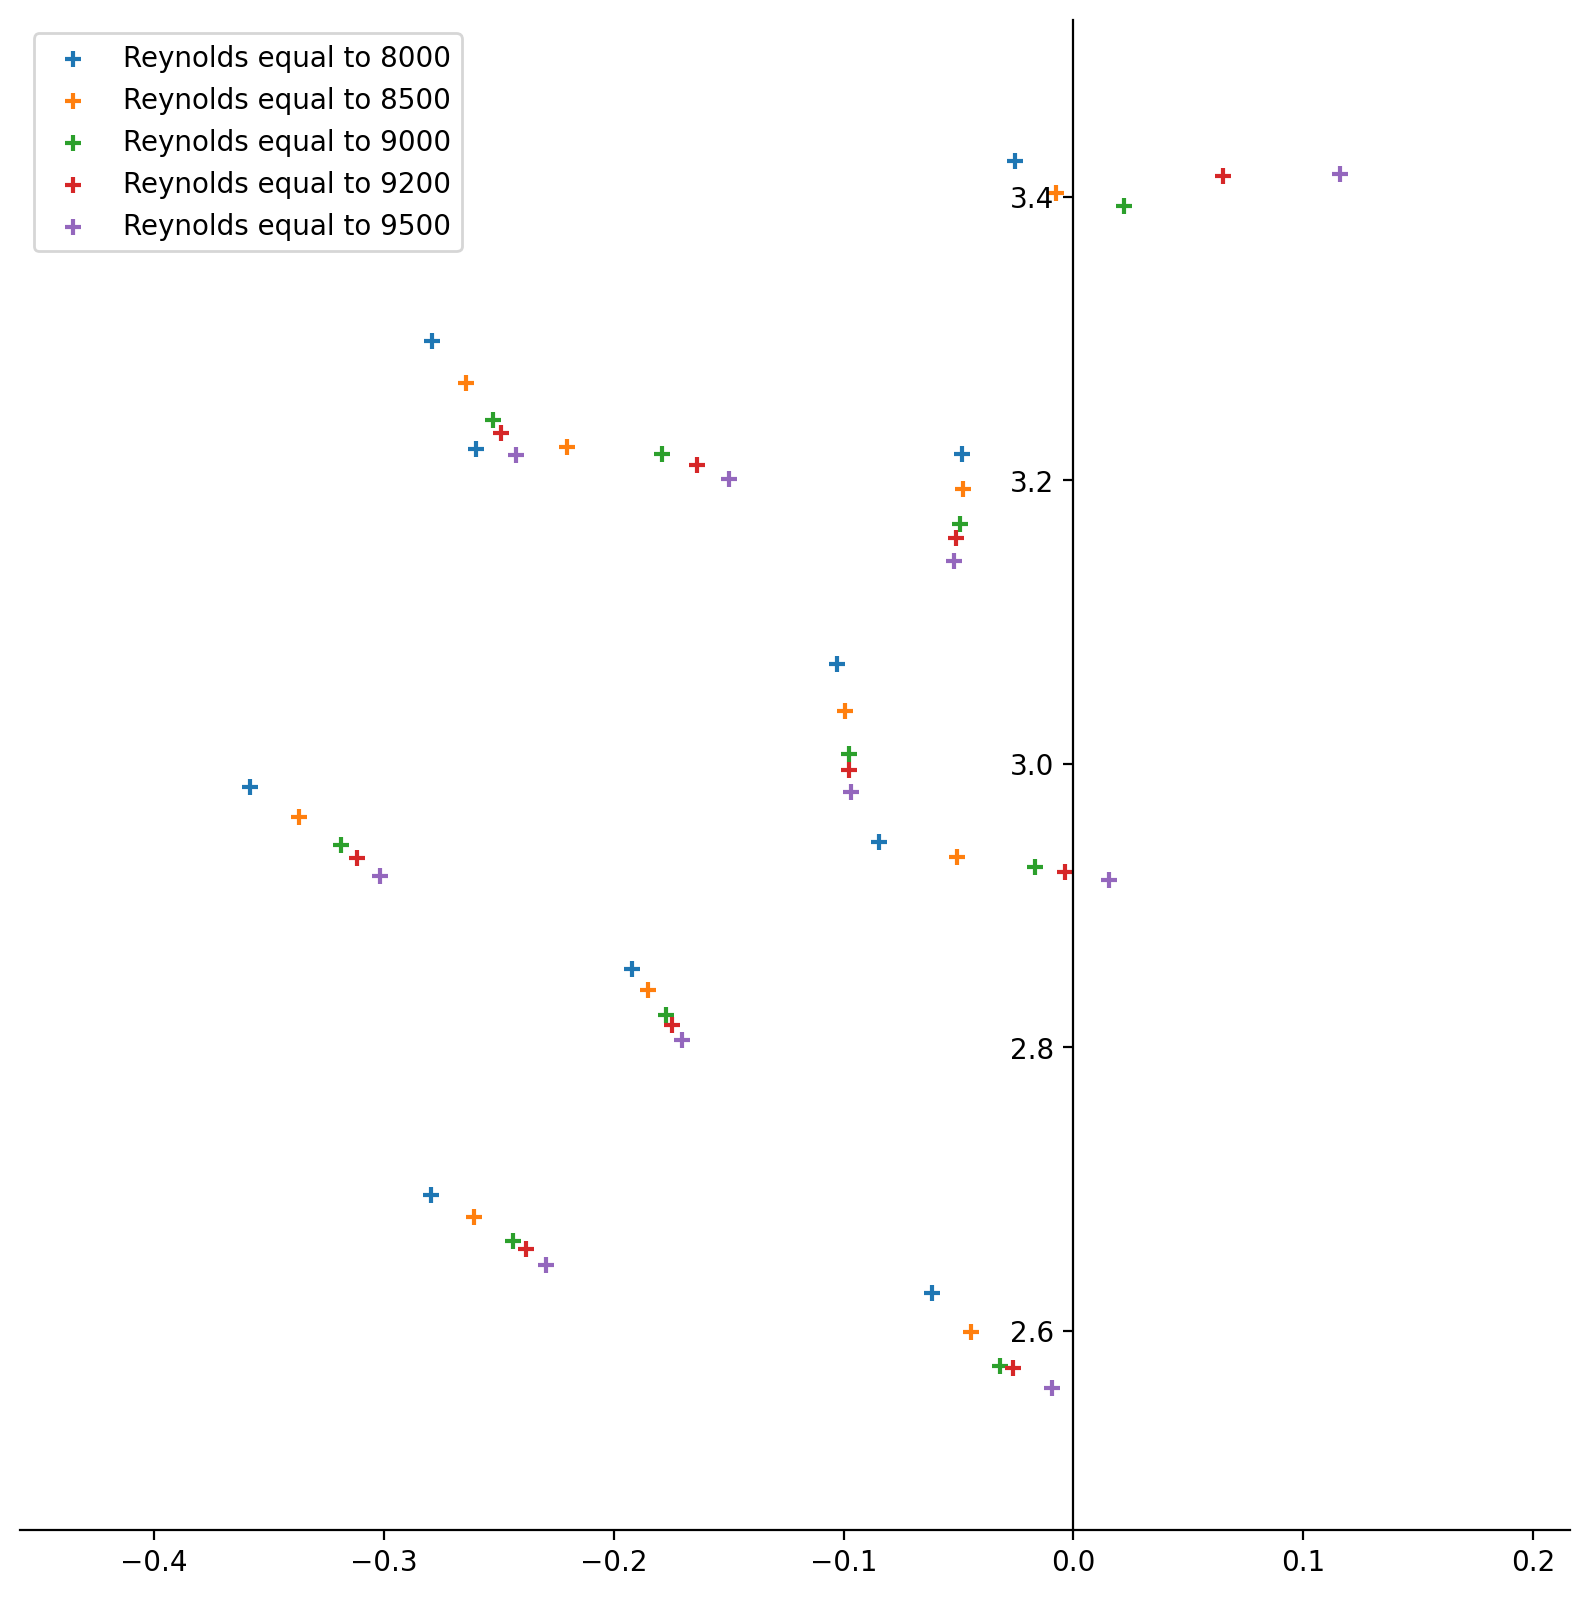

In [98]:
import numpy

from fvm import Continuation
from fvm import Interface
from fvm import utils
from fvm import plot_utils

from jadapy import jdqz

from fvm.JadaInterface import JadaInterface, JadaOp

import matplotlib.pyplot as plt

# Obtain the 4k steady state solution. 
dim = 2
dof = 3
nx = 50
ny = nx
nz = 1
n = dof * nx * ny * nz

# Define a point of interest
poi = (nx // 2 -1 , ny // 2 -1 )
print(poi)



# Config
# set the starting Reynolds number
starting_re = 500
# set how many eigenvalue we want to calculate per case. 
# This needs to be higher than 10 to obtain a good eigenvector approximation
eigs_per_calc = 10
# Reynolds number where the bifucation happens
Re_c = 9200
# set the Reynold numbers for which the linear stability analysis is preformed.
targets = [8000,8500,9000,Re_c,9500]




# Find bifurecation at Re = ~8750 around e = 2.5j, ONLY when nx=50.  
#targets = [8000,8500,9000,9500,10000]


# Define the problem
parameters = {'Problem Type': 'Lid-driven cavity',
              # Problem parametes
              'Reynolds Number': starting_re,
              'Lid Velocity': 0,
              'Grid Stretching Factor': 1.5,
              'Verbose': False,
              # Value describes the value that is traced in the continuation
              # and time integration methods
              'Value': lambda x: utils.create_state_mtx(x, nx, ny, nz, dof)[poi[0], poi[1], 0, 0]}

# New interface and continution object, this was done to easily switch between grid sizes. 
interface = Interface(parameters, nx, ny, nz, dim, dof)
continuation = Continuation(interface, parameters)

# Compute the initial steady solution for the starting Reynolds number and lid velocity 1.
x0 = numpy.zeros(dof * nx * ny * nz)
steady_sol = continuation.continuation(x0, 'Lid Velocity', 0, 1, 0.05)[0]
print("Finished calculating starting solution for nx=ny={}".format(nx))
print()


ds = 40

# set object that remember the 
eigs = numpy.zeros([len(targets), eigs_per_calc], dtype=numpy.complex128)
sol = steady_sol
Re = starting_re
previous_subspaces = None
i = 0

# memory value for the eigenvectors for the plot
bif_eigenvalues =  None
bif_eigenvectors =  None
bif_q_subspace = None
bif_z_subspace = None

for target in targets:
    # Contine to each Reynolds number target, and set Re to this new value. 
    # We don't really need the raw data output here. So that is scratched by means of _. 
    sol, Re, _ = continuation.continuation(sol, 'Reynolds Number', Re, target, ds)
    
    # This eigenvalue calculation is the same as the JVM lib uses in its examples. 
    # Slightly modified for input, but largely the same, and takes full advantage of the 
    # pre-conditioning performed by the FVM library. 
    print("start eigenvalue calc...")
    jac_op = JadaOp(interface.jacobian(sol))
    mass_op = JadaOp(interface.mass_matrix())
    jada_interface = JadaInterface(interface, jac_op, mass_op, n, numpy.complex128)

    # Calculate the actual eigenvalues. 
    alpha, beta, eig_vecs, q, z = jdqz.jdqz(jac_op, mass_op, eigs_per_calc, tol=1e-12, subspace_dimensions=[30, 60], target=3j,
                                            interface=None, arithmetic='complex', prec=jada_interface.shifted_prec,
                                            return_subspaces=True, initial_subspaces=previous_subspaces,
                                            return_eigenvectors=True)

    # Store the generalized eigenvalues, J(x)*v = (a/b) M v, where M is the mass matrix. 
    eigs[i, :] = alpha / beta
                                                      
    # Save the eigenvalue on the bifucation Re_c target.                            
    if target == Re_c:
        bif_eigenvalues = alpha / beta
        bif_eigenvectors = eig_vecs 
        bif_q_subspace = q
        bif_z_subspace = z
        bif_J = jac_op 
        bif_M = mass_op
        print()
        print("Saving Re_c eigenvectors...")
        print()
                                                              
                                
    # Use the subspaces in JDQZ computed for this Reynolds number as initial guesses for JDQZ at the next Reynolds number
    previous_subspaces = (q, z)
    
    # Keep track of the iteration
    i = i+1

    
    
# Plot the eigenvalues
f = plt.figure(figsize=(10,10), dpi= 200, facecolor='w', edgecolor='k')
ax = f.subplots()

for i in range(eigs.shape[0]):
        ax.scatter(eigs[i, :].real, eigs[i, :].imag, marker='+',label='Reynolds equal to ' +str(targets[i]) )
        
ax.set_ylim(abs(eigs.imag).min() - 0.1, abs(eigs.imag).max() + 0.1)
ax.set_xlim(eigs.real.min() - 0.1, eigs.real.max() + 0.1)


# Move left y-axis to zero, and move x-axis to just below the eigenvalues. 
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position(('data', abs(eigs.imag).min() - 0.1))

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


plt.legend()
plt.show()



The graph show that the eigenvalues found for target 3i dim their real value below 0. 

Compex eigenvalue pair moves across the imaginary axis, from negative to postive real components. 
This is Hopf bifurcation. 

The eigenvectors come in the form 
$$ J(x) v = \dfrac{\alpha }{\beta}  M  v $$ 
where $J(x)$ is the jacobian and $M$ the mass matrix of the problem.
Plot of the eigenvector below 

Plots for eigenvale (0.0652482641658615+3.414639668871434j) below
Eigenvector speed change


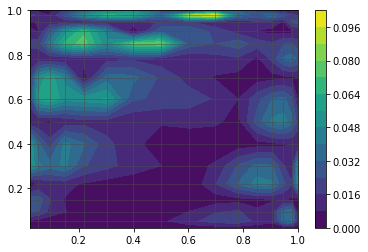

Eigenvector pressure change


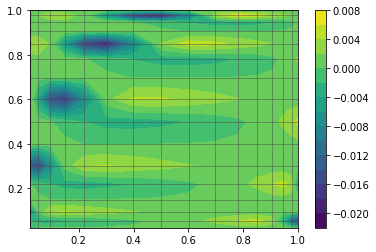

In [188]:
# find the postive real value eigenvalues. 
# i did not want to count indexes each time. 
target_eigs_index = []
for index, eig in enumerate(bif_eigenvalues):
    if eig.real>0:
        target_eigs_index = target_eigs_index + [index]
        
# plot eigenvector corresponding to postive real value eigenvalues. 
for index in target_eigs_index:
    eigenval = bif_eigenvalues[index]
    eigenvec = bif_eigenvectors[:,index]
    print("Plots for eigenvale " + str(eigenval) + " below")    
    velocity_eig = plot_utils.create_state_mtx(eigenvec, nx, ny, nz, dof)
    print("Eigenvector speed change")
    plot_utils.plot_velocity_magnitude(velocity_eig[:, :, 0, 0], velocity_eig[:, :, 0, 1], interface)
    print("Eigenvector pressure change")
    plot_utils.plot_value(velocity_eig[:, :, 0, 2], interface)
    





## (e

In [146]:
sizes = [ 32, 50]#, 512]
dim = 2
dof = 3
nz = 1

for nx in sizes:
    print()
    print("-----------------------------------")
    print("Currently looking at nx=ny={}".format(nx))
    print("First calculate to starting Reynolds number.")
    print("-----------------------------------")
    print()

    ny = nx
    n = dof * nx * ny * nz
    poi = (nx // 2 - 1, ny // 4 - 1)

    # Again we have that FVM already has support for detecting bifurcation points. 
    parameters = {'Problem Type': 'Lid-driven cavity',
              'Reynolds Number': 500,
              'Lid Velocity': 0,
              'Grid Stretching Factor': 1.5,
              'Value': lambda x: utils.create_state_mtx(x, nx, ny, nz, dof)[poi[0], poi[1], 0, 0]}

    interface = Interface(parameters, nx, ny, nz, dim, dof)
    continuation = Continuation(interface, parameters)

    # The initial zero sol. 
    x0 = numpy.zeros(dof * nx * ny * nz)
    # Continue this exact sol to the correct Lid velocity.
    steady_sol = continuation.continuation(x0, 'Lid Velocity', 0, 1, 0.1)[0]
    print("Finished calculating starting solution for nx=ny={}".format(nx))
    print()
    
    # Continue the found branch.
    ds = 100
    start_target = 7000
    steady_sol_7k, mu, _ = continuation.continuation(steady_sol, 'Reynolds Number', 500, start_target, ds)
    
    
    step_size = 200
    end_target = 10000
    Re = start_target
    sol = steady_sol_7k
    eigs_per_calc = 5
    old_eigs = -1*numpy.ones(eigs_per_calc, dtype=numpy.complex128)
    previous_subspaces = None
    
    print()
    print("-----------------------------------")
    print("Starting bifurcation detection. ")
    print("Starting from RE " + str(start_target) + " to " + str(end_target))
    print("-----------------------------------")
    print()
    
    while Re < end_target:
        # Contine to each Reynolds number target, and set Re to this new value. 
        sol, Re, _ = continuation.continuation(sol, 'Reynolds Number', Re, Re + step_size, ds)

        # This eigenvalue calculation is the same as the JVM lib uses in its examples. 
        # Slightly modified for input, but largely the same, and takes full advantage of the 
        # pre-conditioning performed by the FVM library. 
        print("start eigenvalue calc...")
        jac_op = JadaOp(interface.jacobian(sol))
        mass_op = JadaOp(interface.mass_matrix())
        jada_interface = JadaInterface(interface, jac_op, mass_op, n, numpy.complex128)

        # Calculate the actual eigenvalues. 
        alpha, beta, q, z = jdqz.jdqz(jac_op, mass_op, eigs_per_calc, tol=1e-12, 
                                                subspace_dimensions=[30, 60], target=3j,
                                                interface=None, arithmetic='complex', 
                                                prec=jada_interface.shifted_prec,
                                                return_subspaces=True, initial_subspaces=previous_subspaces)

        # Store the generalized eigenvalues, J(x)*v = (a/b) M v, where M is the mass matrix. 
        eigs = alpha / beta

        # check if bifurcation is found.
        found = False
        for index, eig in enumerate(eigs):
            
            if old_eigs[index]< 0 and eig.real>0:
                found = True
                print()
                print("-----------------------------------")
                print("Bifurcation found at " + str(Re))
                print("Found eigenvalue " + str(eig))
                print("Old eigenvalue " + str(old_eigs[index]))
                print("-----------------------------------")
                print()

                
            
        if found==False:
            print()
            print("No bifurcation found.")
            print()
            
        old_eigs = eigs


        # Use the subspaces in JDQZ computed for this Reynolds number as initial guesses for JDQZ at the next Reynolds number
        previous_subspaces = (q, z)

    
    


-----------------------------------
Currently looking at nx=ny=32
First calculate to starting Reynolds number.
-----------------------------------

Newton corrector converged in 1 iterations with ||F||=5.580582e-06
Lid Velocity: 0.098538
Newton corrector converged in 1 iterations with ||F||=8.828751e-05
Lid Velocity: 0.295695
Newton corrector converged in 3 iterations with ||F||=1.291135e-05
Lid Velocity: 0.688694
Newton corrector converged in 2 iterations with ||F||=6.838175e-05
Lid Velocity: 1.081199
Newton corrector converged in 1 iterations with ||F||=8.061309e-07
Lid Velocity: 1.000070
Newton corrector converged in 0 iterations with ||F||=8.284099e-07
Lid Velocity: 1.000000
Convergence achieved onto target Lid Velocity = 1.000000
Finished calculating starting solution for nx=ny=32

Newton corrector converged in 1 iterations with ||F||=2.834836e-06
Reynolds Number: 600.016281
Newton corrector converged in 1 iterations with ||F||=4.391920e-05
Reynolds Number: 800.048840
Newton corr

Step:    5, subspace dimension:   9, eigenvalue estimate: -9.354449e-02 +  2.938726e+00i, residual norm: 2.188361e-10
Step:    6, subspace dimension:  10, eigenvalue estimate: -9.354432e-02 +  2.938726e+00i, residual norm: 5.853473e-12
Step:    7, subspace dimension:  11, eigenvalue estimate: -9.354432e-02 +  2.938726e+00i, residual norm: 1.975048e-13
Found an eigenvalue: (-0.09354431587692108+2.9387262618520493j)
Step:    7, subspace dimension:  10, eigenvalue estimate: -1.846176e-01 +  3.124655e+00i, residual norm: 9.059736e-06
Step:    8, subspace dimension:  11, eigenvalue estimate: -1.848434e-01 +  3.125708e+00i, residual norm: 9.945110e-07
Step:    9, subspace dimension:  12, eigenvalue estimate: -1.846466e-01 +  3.125149e+00i, residual norm: 2.961692e-07
Step:   10, subspace dimension:  13, eigenvalue estimate: -1.848340e-01 +  3.125270e+00i, residual norm: 9.247756e-08
Step:   11, subspace dimension:  14, eigenvalue estimate: -1.847815e-01 +  3.125249e+00i, residual norm: 3.025

Step:   21, subspace dimension:  23, eigenvalue estimate: -1.477929e-01 +  2.807575e+00i, residual norm: 5.985257e-06
Step:   22, subspace dimension:  24, eigenvalue estimate: -1.465781e-01 +  2.807237e+00i, residual norm: 6.458513e-07
Step:   23, subspace dimension:  25, eigenvalue estimate: -1.470036e-01 +  2.807578e+00i, residual norm: 1.196268e-07
Step:   24, subspace dimension:  26, eigenvalue estimate: -1.469904e-01 +  2.807566e+00i, residual norm: 2.102806e-08
Step:   25, subspace dimension:  27, eigenvalue estimate: -1.470012e-01 +  2.807556e+00i, residual norm: 3.475834e-09
Step:   26, subspace dimension:  28, eigenvalue estimate: -1.470005e-01 +  2.807558e+00i, residual norm: 6.536382e-10
Step:   27, subspace dimension:  29, eigenvalue estimate: -1.470005e-01 +  2.807558e+00i, residual norm: 1.373781e-10
Step:   28, subspace dimension:  30, eigenvalue estimate: -1.470005e-01 +  2.807558e+00i, residual norm: 2.350591e-11
Step:   29, subspace dimension:  31, eigenvalue estimate

Step:   36, subspace dimension:  36, eigenvalue estimate: -2.880688e-01 +  3.051981e+00i, residual norm: 6.546498e-06
Step:   37, subspace dimension:  37, eigenvalue estimate: -2.939791e-01 +  3.051592e+00i, residual norm: 3.587362e-07
Step:   38, subspace dimension:  38, eigenvalue estimate: -2.936119e-01 +  3.052151e+00i, residual norm: 4.683942e-08
Step:   39, subspace dimension:  39, eigenvalue estimate: -2.935816e-01 +  3.052186e+00i, residual norm: 1.578056e-09
Step:   40, subspace dimension:  40, eigenvalue estimate: -2.935813e-01 +  3.052187e+00i, residual norm: 4.133681e-11
Step:   41, subspace dimension:  41, eigenvalue estimate: -2.935813e-01 +  3.052187e+00i, residual norm: 7.383866e-13
Found an eigenvalue: (-0.2935812634795304+3.052186813221347j)

No bifurcation found.

Newton corrector converged in 0 iterations with ||F||=4.240515e-05
Reynolds Number: 7900.000000
Newton corrector converged in 0 iterations with ||F||=4.109932e-05
Reynolds Number: 8100.000000
Newton correct

Step:    6, subspace dimension:   9, eigenvalue estimate: -1.754537e-01 +  3.077329e+00i, residual norm: 9.222708e-06
Step:    7, subspace dimension:  10, eigenvalue estimate: -1.782584e-01 +  3.074276e+00i, residual norm: 1.120820e-06
Step:    8, subspace dimension:  11, eigenvalue estimate: -1.779141e-01 +  3.074431e+00i, residual norm: 3.601895e-07
Step:    9, subspace dimension:  12, eigenvalue estimate: -1.780089e-01 +  3.074658e+00i, residual norm: 1.276564e-07
Step:   10, subspace dimension:  13, eigenvalue estimate: -1.779850e-01 +  3.074550e+00i, residual norm: 6.199433e-08
Step:   11, subspace dimension:  14, eigenvalue estimate: -1.779697e-01 +  3.074518e+00i, residual norm: 2.964012e-08
Step:   12, subspace dimension:  15, eigenvalue estimate: -1.779777e-01 +  3.074518e+00i, residual norm: 9.255657e-09
Step:   13, subspace dimension:  16, eigenvalue estimate: -1.779692e-01 +  3.074525e+00i, residual norm: 3.433843e-09
Step:   14, subspace dimension:  17, eigenvalue estimate

Found an eigenvalue: (-0.17534764339812106+3.0619872667552395j)
Step:   22, subspace dimension:  24, eigenvalue estimate: -1.880542e-01 +  3.136084e+00i, residual norm: 5.092328e-06
Step:   23, subspace dimension:  25, eigenvalue estimate: -1.891483e-01 +  3.137906e+00i, residual norm: 9.324560e-07
Step:   24, subspace dimension:  26, eigenvalue estimate: -1.891670e-01 +  3.137806e+00i, residual norm: 2.947872e-07
Step:   25, subspace dimension:  27, eigenvalue estimate: -1.890680e-01 +  3.137851e+00i, residual norm: 1.183464e-07
Step:   26, subspace dimension:  28, eigenvalue estimate: -1.890290e-01 +  3.137855e+00i, residual norm: 6.141334e-08
Step:   27, subspace dimension:  29, eigenvalue estimate: -1.890084e-01 +  3.137900e+00i, residual norm: 2.899913e-08
Step:   28, subspace dimension:  30, eigenvalue estimate: -1.890056e-01 +  3.137915e+00i, residual norm: 1.096993e-08
Step:   29, subspace dimension:  31, eigenvalue estimate: -1.890093e-01 +  3.137920e+00i, residual norm: 2.016

Step:   36, subspace dimension:  37, eigenvalue estimate: -2.623373e-01 +  3.007536e+00i, residual norm: 6.190168e-11
Step:   37, subspace dimension:  38, eigenvalue estimate: -2.623375e-01 +  3.007536e+00i, residual norm: 2.035830e-12
Step:   38, subspace dimension:  39, eigenvalue estimate: -2.623375e-01 +  3.007536e+00i, residual norm: 3.584097e-14
Found an eigenvalue: (-0.26233748875195084+3.007536196836942j)
Step:   38, subspace dimension:  38, eigenvalue estimate: -1.264718e-01 +  2.742194e+00i, residual norm: 5.247097e-06
Step:   39, subspace dimension:  39, eigenvalue estimate: -1.279228e-01 +  2.741437e+00i, residual norm: 4.203151e-07
Step:   40, subspace dimension:  40, eigenvalue estimate: -1.278722e-01 +  2.741455e+00i, residual norm: 1.492389e-08
Step:   41, subspace dimension:  41, eigenvalue estimate: -1.278712e-01 +  2.741451e+00i, residual norm: 2.395497e-10
Step:   42, subspace dimension:  42, eigenvalue estimate: -1.278712e-01 +  2.741451e+00i, residual norm: 3.2262

Step:    3, subspace dimension:   7, eigenvalue estimate: -1.675737e-01 +  3.025232e+00i, residual norm: 8.638426e-08
Step:    4, subspace dimension:   8, eigenvalue estimate: -1.675899e-01 +  3.025079e+00i, residual norm: 1.421596e-08
Step:    5, subspace dimension:   9, eigenvalue estimate: -1.675959e-01 +  3.025087e+00i, residual norm: 2.881219e-09
Step:    6, subspace dimension:  10, eigenvalue estimate: -1.675915e-01 +  3.025092e+00i, residual norm: 6.493582e-10
Step:    7, subspace dimension:  11, eigenvalue estimate: -1.675917e-01 +  3.025093e+00i, residual norm: 8.145800e-11
Step:    8, subspace dimension:  12, eigenvalue estimate: -1.675917e-01 +  3.025093e+00i, residual norm: 1.546905e-11
Step:    9, subspace dimension:  13, eigenvalue estimate: -1.675917e-01 +  3.025093e+00i, residual norm: 4.175186e-12
Step:   10, subspace dimension:  14, eigenvalue estimate: -1.675917e-01 +  3.025093e+00i, residual norm: 9.432423e-13
Found an eigenvalue: (-0.16759171910806447+3.02509263077

Step:   20, subspace dimension:  22, eigenvalue estimate: -5.349189e-02 +  2.809563e+00i, residual norm: 4.062150e-07
Step:   21, subspace dimension:  23, eigenvalue estimate: -5.338780e-02 +  2.809406e+00i, residual norm: 1.376219e-07
Step:   22, subspace dimension:  24, eigenvalue estimate: -5.347775e-02 +  2.809430e+00i, residual norm: 4.738838e-08
Step:   23, subspace dimension:  25, eigenvalue estimate: -5.349746e-02 +  2.809415e+00i, residual norm: 2.036573e-08
Step:   24, subspace dimension:  26, eigenvalue estimate: -5.351157e-02 +  2.809422e+00i, residual norm: 5.423557e-09
Step:   25, subspace dimension:  27, eigenvalue estimate: -5.351178e-02 +  2.809424e+00i, residual norm: 1.894456e-09
Step:   26, subspace dimension:  28, eigenvalue estimate: -5.351192e-02 +  2.809426e+00i, residual norm: 6.838695e-10
Step:   27, subspace dimension:  29, eigenvalue estimate: -5.351214e-02 +  2.809426e+00i, residual norm: 2.057709e-10
Step:   28, subspace dimension:  30, eigenvalue estimate

Step:   36, subspace dimension:  36, eigenvalue estimate: -2.858630e-01 +  3.061450e+00i, residual norm: 4.690734e-06
Step:   37, subspace dimension:  37, eigenvalue estimate: -2.864773e-01 +  3.062071e+00i, residual norm: 5.215803e-07
Step:   38, subspace dimension:  38, eigenvalue estimate: -2.861039e-01 +  3.061966e+00i, residual norm: 4.446479e-08
Step:   39, subspace dimension:  39, eigenvalue estimate: -2.860944e-01 +  3.061957e+00i, residual norm: 7.771387e-10
Step:   40, subspace dimension:  40, eigenvalue estimate: -2.860943e-01 +  3.061956e+00i, residual norm: 8.252534e-12
Step:   41, subspace dimension:  41, eigenvalue estimate: -2.860943e-01 +  3.061956e+00i, residual norm: 1.136884e-13
Found an eigenvalue: (-0.2860942828930496+3.0619564670116484j)

No bifurcation found.

Newton corrector converged in 0 iterations with ||F||=3.911282e-05
Reynolds Number: 9500.000000
Newton corrector converged in 0 iterations with ||F||=3.879220e-05
Reynolds Number: 9700.000000
Newton correc

Step:   10, subspace dimension:  14, eigenvalue estimate: -1.564844e-01 +  2.977017e+00i, residual norm: 1.247005e-13
Found an eigenvalue: (-0.1564843732203771+2.9770167480732392j)
Step:   10, subspace dimension:  13, eigenvalue estimate: -1.641849e-01 +  3.043061e+00i, residual norm: 3.757095e-06
Step:   11, subspace dimension:  14, eigenvalue estimate: -1.678040e-01 +  3.044407e+00i, residual norm: 4.135848e-07
Step:   12, subspace dimension:  15, eigenvalue estimate: -1.672994e-01 +  3.044161e+00i, residual norm: 5.473043e-08
Step:   13, subspace dimension:  16, eigenvalue estimate: -1.672501e-01 +  3.044199e+00i, residual norm: 1.159689e-08
Step:   14, subspace dimension:  17, eigenvalue estimate: -1.672314e-01 +  3.044201e+00i, residual norm: 2.367687e-09
Step:   15, subspace dimension:  18, eigenvalue estimate: -1.672297e-01 +  3.044204e+00i, residual norm: 4.079407e-10
Step:   16, subspace dimension:  19, eigenvalue estimate: -1.672297e-01 +  3.044204e+00i, residual norm: 6.6162

Step:   25, subspace dimension:  27, eigenvalue estimate: -2.256989e-01 +  2.928266e+00i, residual norm: 6.128922e-11
Step:   26, subspace dimension:  28, eigenvalue estimate: -2.256989e-01 +  2.928266e+00i, residual norm: 1.402662e-11
Step:   27, subspace dimension:  29, eigenvalue estimate: -2.256989e-01 +  2.928266e+00i, residual norm: 1.752193e-12
Step:   28, subspace dimension:  30, eigenvalue estimate: -2.256989e-01 +  2.928266e+00i, residual norm: 2.856934e-13
Found an eigenvalue: (-0.22569887681100978+2.928265743228467j)
Step:   28, subspace dimension:  29, eigenvalue estimate: -4.375341e-02 +  2.766177e+00i, residual norm: 6.967752e-06
Step:   29, subspace dimension:  30, eigenvalue estimate: -4.551704e-02 +  2.756858e+00i, residual norm: 1.114020e-06
Step:   30, subspace dimension:  31, eigenvalue estimate: -4.597026e-02 +  2.757514e+00i, residual norm: 9.715572e-08
Step:   31, subspace dimension:  32, eigenvalue estimate: -4.592286e-02 +  2.757514e+00i, residual norm: 6.7055

Step:   31, subspace dimension:  30, eigenvalue estimate: -1.476831e-01 +  2.949224e+00i, residual norm: 9.005456e-12
Step:   32, subspace dimension:  31, eigenvalue estimate: -1.476831e-01 +  2.949224e+00i, residual norm: 4.449890e-13
Found an eigenvalue: (-0.1476830965560024+2.9492236184377334j)
Step:   32, subspace dimension:  30, eigenvalue estimate: -5.461227e-02 +  3.230674e+00i, residual norm: 1.770463e-11
Step:   33, subspace dimension:  31, eigenvalue estimate: -5.461228e-02 +  3.230674e+00i, residual norm: 4.421413e-12
Step:   34, subspace dimension:  32, eigenvalue estimate: -5.461228e-02 +  3.230674e+00i, residual norm: 4.801325e-13
Found an eigenvalue: (-0.054612278074172994+3.230674308086161j)
Step:   34, subspace dimension:  31, eigenvalue estimate: -2.045737e-01 +  2.841453e+00i, residual norm: 8.615032e-11
Step:   35, subspace dimension:  32, eigenvalue estimate: -2.045736e-01 +  2.841453e+00i, residual norm: 1.509415e-11
Step:   36, subspace dimension:  33, eigenvalue

Step:    7, subspace dimension:  10, eigenvalue estimate: -1.233170e-01 +  2.927394e+00i, residual norm: 1.111968e-07
Step:    8, subspace dimension:  11, eigenvalue estimate: -1.233925e-01 +  2.927514e+00i, residual norm: 3.476977e-08
Step:    9, subspace dimension:  12, eigenvalue estimate: -1.234817e-01 +  2.927613e+00i, residual norm: 7.678879e-09
Step:   10, subspace dimension:  13, eigenvalue estimate: -1.235074e-01 +  2.927620e+00i, residual norm: 2.023132e-09
Step:   11, subspace dimension:  14, eigenvalue estimate: -1.235121e-01 +  2.927611e+00i, residual norm: 4.344027e-10
Step:   12, subspace dimension:  15, eigenvalue estimate: -1.235115e-01 +  2.927611e+00i, residual norm: 1.180150e-10
Step:   13, subspace dimension:  16, eigenvalue estimate: -1.235117e-01 +  2.927611e+00i, residual norm: 2.917214e-11
Step:   14, subspace dimension:  17, eigenvalue estimate: -1.235117e-01 +  2.927611e+00i, residual norm: 6.185405e-12
Step:   15, subspace dimension:  18, eigenvalue estimate

Step:   27, subspace dimension:  28, eigenvalue estimate: -1.935459e-01 +  2.831213e+00i, residual norm: 8.005042e-08
Step:   28, subspace dimension:  29, eigenvalue estimate: -1.935429e-01 +  2.831230e+00i, residual norm: 2.190168e-08
Step:   29, subspace dimension:  30, eigenvalue estimate: -1.935496e-01 +  2.831218e+00i, residual norm: 7.154627e-09
Step:   30, subspace dimension:  31, eigenvalue estimate: -1.935508e-01 +  2.831213e+00i, residual norm: 3.143823e-10
Step:   31, subspace dimension:  32, eigenvalue estimate: -1.935506e-01 +  2.831213e+00i, residual norm: 1.593510e-11
Step:   32, subspace dimension:  33, eigenvalue estimate: -1.935506e-01 +  2.831213e+00i, residual norm: 4.922126e-13
Found an eigenvalue: (-0.19355060458418186+2.8312128428427523j)
Step:   32, subspace dimension:  32, eigenvalue estimate: -2.845044e-01 +  3.174838e+00i, residual norm: 2.048268e-06
Step:   33, subspace dimension:  33, eigenvalue estimate: -2.865392e-01 +  3.175388e+00i, residual norm: 1.685

Step:    7, subspace dimension:  11, eigenvalue estimate: -1.030612e-01 +  3.033955e+00i, residual norm: 2.364156e-12
Step:    8, subspace dimension:  12, eigenvalue estimate: -1.030612e-01 +  3.033955e+00i, residual norm: 3.414022e-13
Found an eigenvalue: (-0.10306115966387112+3.0339548624951096j)
Step:    8, subspace dimension:  11, eigenvalue estimate: -8.173595e-02 +  2.916238e+00i, residual norm: 1.769926e-06
Step:    9, subspace dimension:  12, eigenvalue estimate: -8.476364e-02 +  2.906907e+00i, residual norm: 2.161632e-07
Step:   10, subspace dimension:  13, eigenvalue estimate: -8.481031e-02 +  2.905801e+00i, residual norm: 4.279054e-08
Step:   11, subspace dimension:  14, eigenvalue estimate: -8.487138e-02 +  2.905787e+00i, residual norm: 8.496358e-09
Step:   12, subspace dimension:  15, eigenvalue estimate: -8.485601e-02 +  2.905783e+00i, residual norm: 1.628070e-09
Step:   13, subspace dimension:  16, eigenvalue estimate: -8.485717e-02 +  2.905781e+00i, residual norm: 3.184

Step:   25, subspace dimension:  26, eigenvalue estimate: -1.859738e-01 +  2.814142e+00i, residual norm: 2.369271e-07
Step:   26, subspace dimension:  27, eigenvalue estimate: -1.861166e-01 +  2.814177e+00i, residual norm: 5.682479e-08
Step:   27, subspace dimension:  28, eigenvalue estimate: -1.861068e-01 +  2.814181e+00i, residual norm: 1.208086e-08
Step:   28, subspace dimension:  29, eigenvalue estimate: -1.861074e-01 +  2.814174e+00i, residual norm: 2.798249e-09
Step:   29, subspace dimension:  30, eigenvalue estimate: -1.861077e-01 +  2.814175e+00i, residual norm: 6.986280e-10
Step:   30, subspace dimension:  31, eigenvalue estimate: -1.861078e-01 +  2.814175e+00i, residual norm: 4.071130e-11
Step:   31, subspace dimension:  32, eigenvalue estimate: -1.861078e-01 +  2.814175e+00i, residual norm: 1.555622e-12
Step:   32, subspace dimension:  33, eigenvalue estimate: -1.861078e-01 +  2.814175e+00i, residual norm: 2.986237e-14
Found an eigenvalue: (-0.18610777131557066+2.81417509427

Step:    6, subspace dimension:  10, eigenvalue estimate: -9.940765e-02 +  2.994332e+00i, residual norm: 2.545427e-12
Step:    7, subspace dimension:  11, eigenvalue estimate: -9.940765e-02 +  2.994332e+00i, residual norm: 3.758167e-14
Found an eigenvalue: (-0.09940765387655874+2.9943321821917155j)
Step:    7, subspace dimension:  10, eigenvalue estimate: -5.280544e-02 +  2.895430e+00i, residual norm: 1.817578e-06
Step:    8, subspace dimension:  11, eigenvalue estimate: -4.650442e-02 +  2.893997e+00i, residual norm: 2.257104e-07
Step:    9, subspace dimension:  12, eigenvalue estimate: -4.497409e-02 +  2.893013e+00i, residual norm: 3.973226e-08
Step:   10, subspace dimension:  13, eigenvalue estimate: -4.504534e-02 +  2.892909e+00i, residual norm: 7.714280e-09
Step:   11, subspace dimension:  14, eigenvalue estimate: -4.504387e-02 +  2.892891e+00i, residual norm: 1.408970e-09
Step:   12, subspace dimension:  15, eigenvalue estimate: -4.504327e-02 +  2.892887e+00i, residual norm: 2.300

Step:   25, subspace dimension:  26, eigenvalue estimate: -1.879431e-01 +  3.158548e+00i, residual norm: 1.819277e-07
Step:   26, subspace dimension:  27, eigenvalue estimate: -1.878174e-01 +  3.158510e+00i, residual norm: 3.982119e-08
Step:   27, subspace dimension:  28, eigenvalue estimate: -1.878227e-01 +  3.158453e+00i, residual norm: 9.400012e-09
Step:   28, subspace dimension:  29, eigenvalue estimate: -1.878310e-01 +  3.158447e+00i, residual norm: 1.977088e-09
Step:   29, subspace dimension:  30, eigenvalue estimate: -1.878308e-01 +  3.158445e+00i, residual norm: 4.525149e-10
Step:   30, subspace dimension:  31, eigenvalue estimate: -1.878302e-01 +  3.158444e+00i, residual norm: 3.135025e-11
Step:   31, subspace dimension:  32, eigenvalue estimate: -1.878302e-01 +  3.158444e+00i, residual norm: 9.177413e-13
Found an eigenvalue: (-0.1878301652937923+3.1584437205093465j)
Step:   31, subspace dimension:  31, eigenvalue estimate: -1.787183e-01 +  2.792604e+00i, residual norm: 2.0830

Step:    6, subspace dimension:  10, eigenvalue estimate: -9.818714e-02 +  2.958157e+00i, residual norm: 2.654718e-12
Step:    7, subspace dimension:  11, eigenvalue estimate: -9.818713e-02 +  2.958157e+00i, residual norm: 3.649333e-14
Found an eigenvalue: (-0.0981871341881291+2.958157394593205j)
Step:    7, subspace dimension:  10, eigenvalue estimate: -7.837573e-03 +  2.885107e+00i, residual norm: 2.265820e-06
Step:    8, subspace dimension:  11, eigenvalue estimate: -9.994961e-03 +  2.882293e+00i, residual norm: 3.181311e-07
Step:    9, subspace dimension:  12, eigenvalue estimate: -7.755748e-03 +  2.884797e+00i, residual norm: 7.368634e-08
Step:   10, subspace dimension:  13, eigenvalue estimate: -7.390231e-03 +  2.884817e+00i, residual norm: 1.441858e-08
Step:   11, subspace dimension:  14, eigenvalue estimate: -7.309516e-03 +  2.884790e+00i, residual norm: 1.611985e-09
Step:   12, subspace dimension:  15, eigenvalue estimate: -7.315343e-03 +  2.884790e+00i, residual norm: 1.48516

Step:   25, subspace dimension:  27, eigenvalue estimate: -5.245395e-02 +  3.110251e+00i, residual norm: 3.079970e-13
Found an eigenvalue: (-0.052453945798595275+3.1102510608676575j)
Step:   25, subspace dimension:  26, eigenvalue estimate: -1.573810e-01 +  3.144047e+00i, residual norm: 1.356509e-06
Step:   26, subspace dimension:  27, eigenvalue estimate: -1.565382e-01 +  3.144894e+00i, residual norm: 1.881584e-07
Step:   27, subspace dimension:  28, eigenvalue estimate: -1.561696e-01 +  3.144855e+00i, residual norm: 5.061773e-08
Step:   28, subspace dimension:  29, eigenvalue estimate: -1.562141e-01 +  3.144790e+00i, residual norm: 1.284179e-08
Step:   29, subspace dimension:  30, eigenvalue estimate: -1.562169e-01 +  3.144775e+00i, residual norm: 3.577484e-09
Step:   30, subspace dimension:  31, eigenvalue estimate: -1.562197e-01 +  3.144768e+00i, residual norm: 2.909427e-10
Step:   31, subspace dimension:  32, eigenvalue estimate: -1.562198e-01 +  3.144768e+00i, residual norm: 1.06

Step:    2, subspace dimension:   6, eigenvalue estimate: -5.610130e-02 +  3.087312e+00i, residual norm: 2.130734e-08
Step:    3, subspace dimension:   7, eigenvalue estimate: -5.594581e-02 +  3.087181e+00i, residual norm: 6.750363e-10
Step:    4, subspace dimension:   8, eigenvalue estimate: -5.594002e-02 +  3.087191e+00i, residual norm: 9.592321e-12
Step:    5, subspace dimension:   9, eigenvalue estimate: -5.594000e-02 +  3.087191e+00i, residual norm: 1.143359e-12
Step:    6, subspace dimension:  10, eigenvalue estimate: -5.594000e-02 +  3.087191e+00i, residual norm: 2.068156e-13
Found an eigenvalue: (-0.05594000202763559+3.0871911815383233j)
Step:    6, subspace dimension:   9, eigenvalue estimate:  3.310684e-02 +  2.898126e+00i, residual norm: 2.263114e-06
Step:    7, subspace dimension:  10, eigenvalue estimate: -9.618217e-02 +  2.925717e+00i, residual norm: 1.083313e-06
Step:    8, subspace dimension:  11, eigenvalue estimate: -9.689966e-02 +  2.927593e+00i, residual norm: 1.100

Note that when starting at higher Re and lower resolution, it is possible that eigenvalue already crossed the imaginary axis. For example at $n=32$ the first Hopf bifurcation occurs at $Re_c \approx 5000-6000$. If the starting $Re$ is set higher, $7000$ for example, then the bifurcation is simply not found by the above algrithm


I know that when $n=128$ that $Re_c \approx 8750$, and for higher resolutions that $Re_c$ aproaches $9000$ and at lower resolution the bifurcation occurs at a earlier Reynolds number. Around $6000$ for $n=32$

## f)

Now we are going to compute the transients for $\dfrac{Re - Re_c}{Re_c} = \pm 0.01$

In [176]:


from fvm import TimeIntegration


# size parameters
dim = 2
dof = 3
nz = 1
nx = 32
ny = nx
n = dof * nx * ny * nz
poi = (nx // 2 - 1, ny // 4 - 1)

REc = 8750
Coefficient = 0.01
lowRE = -Coefficient*REc+REc
highRE = Coefficient*REc+REc
theta = 0.52
T = 15
DeltaT = 0.1
perturbfactor = 0.1




print()
print("-----------------------------------")
print("Currently looking at nx=ny={}".format(nx))
print("First calculate eigenvector pertubation at REc={}".format(REc))
print("Second calculate the steady state solution at low and high RE")
print("-----------------------------------")
print()

parameters = {'Problem Type': 'Lid-driven cavity',
          'Reynolds Number': 500,
          'Lid Velocity': 0,
          'Grid Stretching Factor': 1.5,
          'Value': lambda x: utils.create_state_mtx(x, nx, ny, nz, dof)[poi[0], poi[1], 0, 0]}

interface = Interface(parameters, nx, ny, nz, dim, dof)
continuation = Continuation(interface, parameters)

# The initial zero sol. 
x0 = numpy.zeros(dof * nx * ny * nz)
# Continue this exact sol to the correct Lid velocity.
steady_sol = continuation.continuation(x0, 'Lid Velocity', 0, 1, 0.1)[0]


# Continue the found branch.
ds = 100
start_target = REc
steady_sol_REc, mu, _ = continuation.continuation(steady_sol, 'Reynolds Number', 500, start_target, ds)


print("Starting eigenvalue calc...")
jac_op = JadaOp(interface.jacobian(sol))
mass_op = JadaOp(interface.mass_matrix())
jada_interface = JadaInterface(interface, jac_op, mass_op, n, numpy.complex128)

# Calculate the actual eigenvalues. 
alpha, beta, eig_vecs, q, z = jdqz.jdqz(jac_op, mass_op, 20, tol=1e-12, subspace_dimensions=[30, 60], target=3j,
                                        interface=None, arithmetic='complex', prec=jada_interface.shifted_prec,
                                        return_subspaces=True, initial_subspaces=None,
                                        return_eigenvectors=True)

# Store the generalized eigenvalues, J(x)*v = (a/b) M v, where M is the mass matrix. 
eigs = alpha / beta

# specific eigenvalue that is chosen, set between 0 and 19
chosen_index = 2
eigval = eigs[chosen_index]
eigvec = eig_vecs[:,chosen_index]
perturb = eigvec

# Calculate starting solution for both high and low RE solutions
steady_sol_lowRe, mu, _ = continuation.continuation(steady_sol_REc, 'Reynolds Number', REc, lowRE, -ds)
steady_sol_highRe, mu, _ = continuation.continuation(steady_sol_REc, 'Reynolds Number', REc, highRE, ds)

print()
print("-----------------------------------")
print("Finished calculating peturbation.")
print("Eigenvalue " + str(eigval) + " with corresponding eigenvector as pertubation" )
print("-----------------------------------")
print()
print("-----------------------------------")
print("Time intergration for lower RE={}".format(lowRE))
print("-----------------------------------")
print()


lowParameters = {'Problem Type': 'Lid-driven cavity',
          'Reynolds Number': lowRE,
          'Lid Velocity': 1.0,
          'Grid Stretching Factor': 1.5,
          'Theta': theta,
          'Value': lambda x: utils.create_state_mtx(x, nx, ny, nz, dof)[poi[0], poi[1], 0, 0]}

lowTimeInt = TimeIntegration(interface,lowParameters)

lowPerturbedStart = steady_sol_lowRe + perturbfactor*perturb

lowSol  = lowTimeInt.integration(lowPerturbedStart, DeltaT, T)


print()
print("-----------------------------------")
print("Time intergration for higher RE={}".format(highRE))
print("-----------------------------------")
print()

highParameters = {'Problem Type': 'Lid-driven cavity',
          'Reynolds Number': highRE,
          'Lid Velocity': 1.0,
          'Grid Stretching Factor': 1.5,
          'Theta': theta,
          'Value': lambda x: utils.create_state_mtx(x, nx, ny, nz, dof)[poi[0], poi[1], 0, 0]}

highTimeInt = TimeIntegration(interface,highParameters)

highPerturbedStart = steady_sol_highRe + perturbfactor*perturb

highSol  = highTimeInt.integration(highPerturbedStart, DeltaT, T)



-----------------------------------
Currently looking at nx=ny=16
First calculate eigenvector pertubation at REc=8750
Second calculate the steady state solution at low and high RE
-----------------------------------

Newton corrector converged in 1 iterations with ||F||=9.696733e-06
Lid Velocity: 0.098617
Newton corrector converged in 2 iterations with ||F||=5.443363e-06
Lid Velocity: 0.295682
Newton corrector converged in 2 iterations with ||F||=7.372243e-05
Lid Velocity: 0.590996
Newton corrector converged in 3 iterations with ||F||=2.451180e-07
Lid Velocity: 1.033787
Newton corrector converged in 1 iterations with ||F||=5.105529e-07
Lid Velocity: 1.000005
Newton corrector converged in 0 iterations with ||F||=5.118124e-07
Lid Velocity: 1.000000
Convergence achieved onto target Lid Velocity = 1.000000
Newton corrector converged in 1 iterations with ||F||=3.909579e-06
Reynolds Number: 600.065189
Newton corrector converged in 1 iterations with ||F||=5.814224e-05
Reynolds Number: 800.19

Step:   38, subspace dimension:  30, eigenvalue estimate: -4.517700e-01 +  1.728532e+00i, residual norm: 3.301285e-10
Step:   39, subspace dimension:  31, eigenvalue estimate: -4.517700e-01 +  1.728532e+00i, residual norm: 9.310068e-17
Found an eigenvalue: (-0.45176995346780835+1.728532491250544j)
Step:   39, subspace dimension:  30, eigenvalue estimate: -3.885412e-01 +  1.606379e+00i, residual norm: 1.296376e-08
Step:   40, subspace dimension:  31, eigenvalue estimate: -3.885409e-01 +  1.606379e+00i, residual norm: 8.339019e-10
Step:   41, subspace dimension:  32, eigenvalue estimate: -3.885409e-01 +  1.606379e+00i, residual norm: 5.888910e-11
Step:   42, subspace dimension:  33, eigenvalue estimate: -3.885409e-01 +  1.606379e+00i, residual norm: 1.785293e-12
Step:   43, subspace dimension:  34, eigenvalue estimate: -3.885409e-01 +  1.606379e+00i, residual norm: 1.543309e-14
Found an eigenvalue: (-0.3885409163482859+1.6063792859309418j)
Step:   43, subspace dimension:  33, eigenvalue 

t = 3.100000
Newton converged in 2 iterations with ||F||=1.764986e-13
t = 3.200000
Newton converged in 2 iterations with ||F||=2.013794e-13
t = 3.300000
Newton converged in 2 iterations with ||F||=2.020168e-13
t = 3.400000
Newton converged in 2 iterations with ||F||=2.073961e-13
t = 3.500000
Newton converged in 2 iterations with ||F||=2.494148e-13
t = 3.600000
Newton converged in 2 iterations with ||F||=3.018404e-13
t = 3.700000
Newton converged in 2 iterations with ||F||=3.327700e-13
t = 3.800000
Newton converged in 2 iterations with ||F||=3.457615e-13
t = 3.900000
Newton converged in 2 iterations with ||F||=3.527927e-13
t = 4.000000
Newton converged in 2 iterations with ||F||=3.447173e-13
t = 4.100000
Newton converged in 2 iterations with ||F||=3.080274e-13
t = 4.200000
Newton converged in 2 iterations with ||F||=2.516036e-13
t = 4.300000
Newton converged in 2 iterations with ||F||=1.880482e-13
t = 4.400000
Newton converged in 2 iterations with ||F||=1.175691e-13
t = 4.500000
Newton 

t = 14.800000
Newton converged in 3 iterations with ||F||=2.440920e-17
t = 14.900000
Newton converged in 3 iterations with ||F||=2.814023e-17
t = 15.000000
Newton converged in 3 iterations with ||F||=2.439884e-17
t = 15.100000

-----------------------------------
Time intergration for higher RE=8837.5
-----------------------------------

Newton converged in 2 iterations with ||F||=6.266021e-13
t = 0.100000
Newton converged in 2 iterations with ||F||=3.958865e-13
t = 0.200000
Newton converged in 2 iterations with ||F||=2.616472e-13
t = 0.300000
Newton converged in 2 iterations with ||F||=3.486475e-13
t = 0.400000
Newton converged in 2 iterations with ||F||=5.610227e-13
t = 0.500000
Newton converged in 2 iterations with ||F||=6.278725e-13
t = 0.600000
Newton converged in 2 iterations with ||F||=4.640972e-13
t = 0.700000
Newton converged in 2 iterations with ||F||=2.254917e-13
t = 0.800000
Newton converged in 2 iterations with ||F||=1.237172e-13
t = 0.900000
Newton converged in 2 iteratio

Newton converged in 2 iterations with ||F||=1.428890e-11
t = 11.300000
Newton converged in 2 iterations with ||F||=1.815555e-11
t = 11.400000
Newton converged in 2 iterations with ||F||=2.288637e-11
t = 11.500000
Newton converged in 2 iterations with ||F||=2.775728e-11
t = 11.600000
Newton converged in 2 iterations with ||F||=3.239128e-11
t = 11.700000
Newton converged in 2 iterations with ||F||=3.704216e-11
t = 11.800000
Newton converged in 2 iterations with ||F||=4.292086e-11
t = 11.900000
Newton converged in 2 iterations with ||F||=5.205489e-11
t = 12.000000
Newton converged in 2 iterations with ||F||=6.573367e-11
t = 12.100000
Newton converged in 2 iterations with ||F||=8.252572e-11
t = 12.200000
Newton converged in 2 iterations with ||F||=9.822985e-11
t = 12.300000
Newton converged in 3 iterations with ||F||=2.679057e-17
t = 12.400000
Newton converged in 3 iterations with ||F||=2.683044e-17
t = 12.500000
Newton converged in 2 iterations with ||F||=9.442279e-11
t = 12.600000
Newton

## Plot of steady solution at $Re_c$

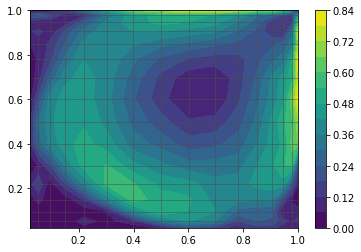

In [177]:
velocity_rec = plot_utils.create_state_mtx(steady_sol_REc, nx, ny, nz, dof)
plot_utils.plot_velocity_magnitude(velocity_rec[:, :, 0, 0], velocity_rec[:, :, 0, 1], interface)

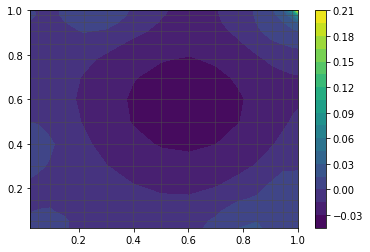

In [178]:
# Plot the pressure
plot_utils.plot_value(velocity_rec[:, :, 0, 2], interface)

## Plot of steady solution at $Re_{low}$

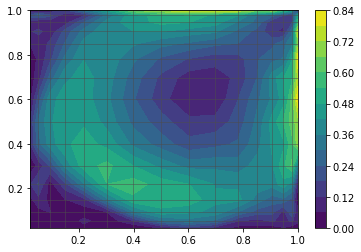

In [179]:
velocity_low = plot_utils.create_state_mtx(lowSol[0], nx, ny, nz, dof)
plot_utils.plot_velocity_magnitude(velocity_low[:, :, 0, 0], velocity_low[:, :, 0, 1], interface)

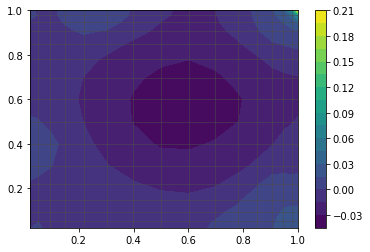

In [180]:
plot_utils.plot_value(velocity_low[:, :, 0, 2], interface)


## Plot of steady solution at $Re_{high}$

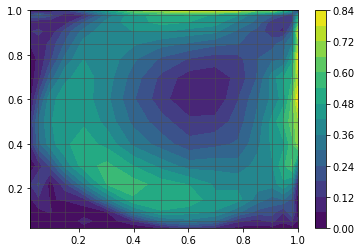

In [181]:
velocity_high = plot_utils.create_state_mtx(highSol[0], nx, ny, nz, dof)
plot_utils.plot_velocity_magnitude(velocity_high[:, :, 0, 0], velocity_high[:, :, 0, 1], interface)

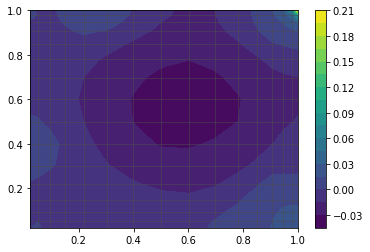

In [182]:
plot_utils.plot_value(velocity_high[:, :, 0, 2], interface)


## Conclusions f

stuff